In [1]:
# Import dependecies
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
# Connect to the SQL Engine
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
data = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2016-08-23').order_by(Measurements.date)
data_list = []
for row in data:
    data_list.append(row)

In [9]:
# Use the list of rows to create a dataframe for the dates and preciptation value: 
date_prcp = pd.DataFrame(data= data_list)
date_prcp = date_prcp.sort_values("date", ascending=True)
date_prcp = date_prcp.set_index("date")
date_prcp.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


<IPython.core.display.Javascript object>


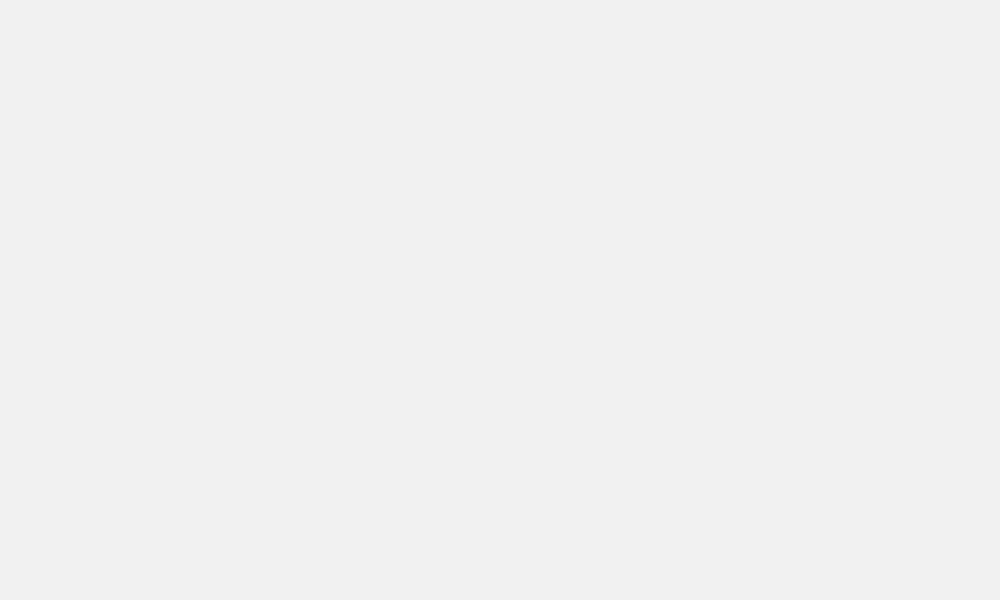

<IPython.core.display.Javascript object>


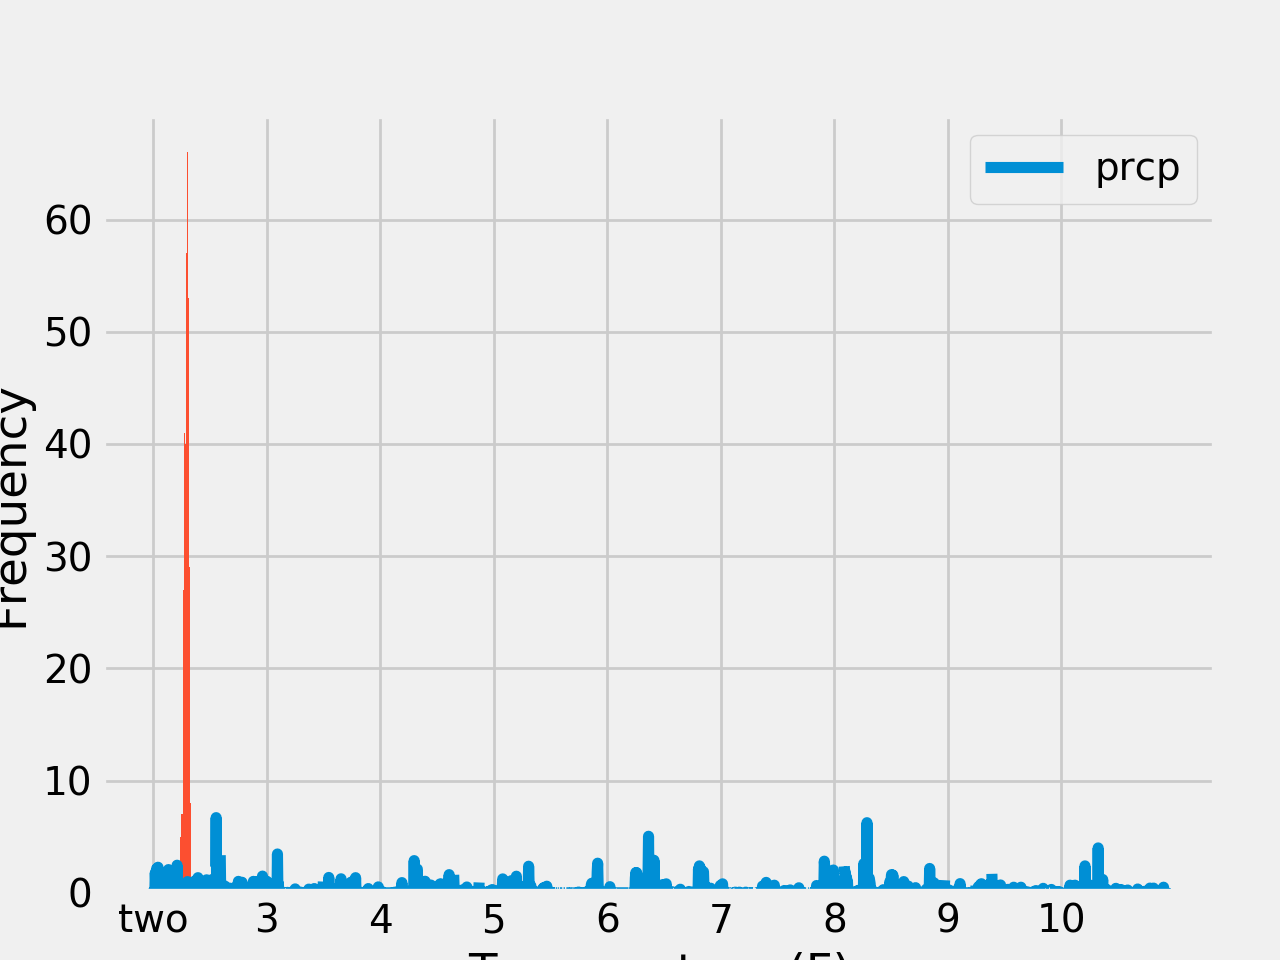

Text(0,0,'two')
Text(0,0,'3')
Text(0,0,'4')
Text(0,0,'5')
Text(0,0,'6')
Text(0,0,'7')
Text(0,0,'8')
Text(0,0,'9')
Text(0,0,'10')


In [10]:
# Plot the precipitation vs dates:
plt.figure(figsize=(5,3))
date_prcp.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
locs, labels = plt.xticks([0,  250,  500,  750, 1000, 1250, 1500, 1750, 2000] , ["two", "3", "4", "5", "6", "7", "8","9","10",])
plt.show()
for label in labels:
    print(label)

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurements_df = pd.read_sql('SELECT * FROM measurement', con=conn)
measurements_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [13]:
# How many stations are available in this dataset?
number_of_stations = measurements_df['station'].nunique()
print(f"The total number of stations is: {number_of_stations}")

The total number of stations is: 9


In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
print(measurements_df['station'].value_counts())
most_observed_station = measurements_df['station'].value_counts().index[0]
observations = measurements_df['station'].value_counts()[0]
print(f"The station with the most observations is stations number: {most_observed_station} with {observations} observations.")

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64
The station with the most observations is stations number: USC00519281 with 2772 observations.


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_df = pd.read_sql("SELECT * FROM measurement WHERE station = 'USC00519281'", con=conn)
temp_df.head()

min_temp = temp_df['tobs'].min()
max_temp = temp_df['tobs'].max()
mean_temp = temp_df['tobs'].mean()

print(f"The minimum temperature for USC00519281 station is: {min_temp}")
print(f"The maximum temperature for USC00519281 station is: {max_temp}")
print(f"The average temperature for USC00519281 station is: {mean_temp}")

The minimum temperature for USC00519281 station is: 54.0
The maximum temperature for USC00519281 station is: 85.0
The average temperature for USC00519281 station is: 71.66378066378067


In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12months_df = pd.read_sql("SELECT * FROM measurement WHERE station = 'USC00519281' AND date >= '2016-08-23'", con=conn)
last12months_df.head()


,id,station,date,prcp,tobs
0,14608,USC00519281,2016-08-23,1.79,77.0
1,14609,USC00519281,2016-08-24,2.15,77.0
2,14610,USC00519281,2016-08-25,0.06,80.0
3,14611,USC00519281,2016-08-26,0.01,80.0
4,14612,USC00519281,2016-08-27,0.12,75.0


In [17]:
# Create a graph of the frequency of each temperature:
plt.hist(last12months_df['tobs'], 12)
#plt.hist(1,2,3,4)
plt.hist(1, 12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.show()

The minimum temperature for your date range is: 56.0
The maximum temperature for your date range is: 87.0
The average temperature for your date range is: 72.49189773136479


<IPython.core.display.Javascript object>


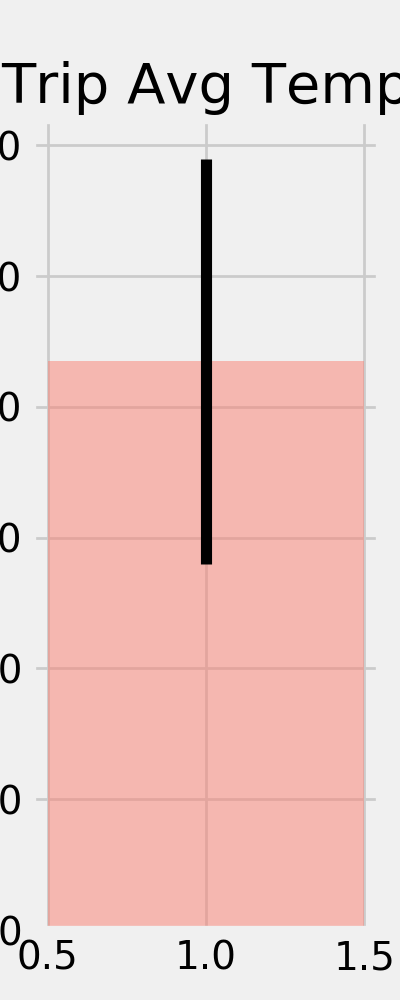

[(56.0, 72.49189773136479, 87.0)]


In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    dataframe = pd.read_sql(f"SELECT * FROM measurement WHERE (date >= '{start_date}' AND date <= '{end_date}')", con=conn)
    min_temp = dataframe['tobs'].min()
    max_temp = dataframe['tobs'].max()
    mean_temp = dataframe['tobs'].mean()
    
    print(f"The minimum temperature for your date range is: {min_temp}")
    print(f"The maximum temperature for your date range is: {max_temp}")
    print(f"The average temperature for your date range is: {mean_temp}")
    
    plt.figure(figsize=(2,5))
    plt.bar(1, max_temp, width=1, yerr=(max_temp - min_temp), color="salmon", alpha=.5)
    plt.ylabel("Temp (F)")
    plt.title("Trip Avg Temp")
    plt.show()
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
print(calc_temps("2010-01-01", "2010-12-30"))

The minimum temperature for your date range is: 56.0
The maximum temperature for your date range is: 87.0
The average temperature for your date range is: 72.49189773136479


<IPython.core.display.Javascript object>


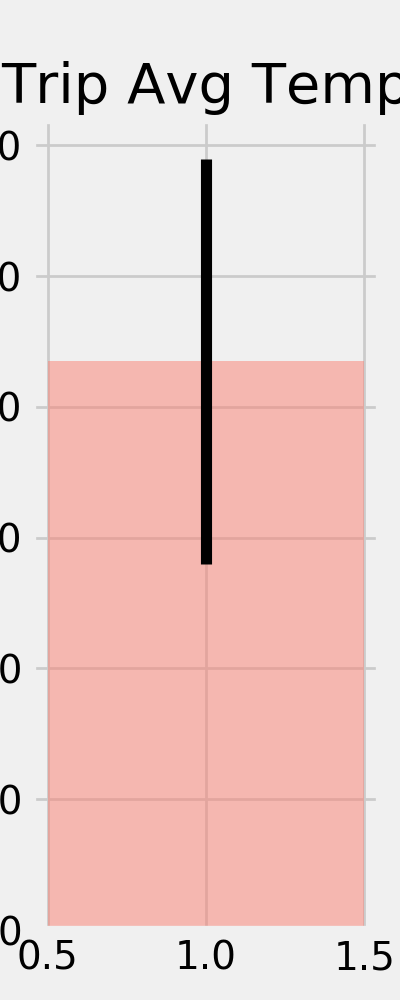

[(56.0, 72.49189773136479, 87.0)]

In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps("2010-01-01", "2010-12-30")

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


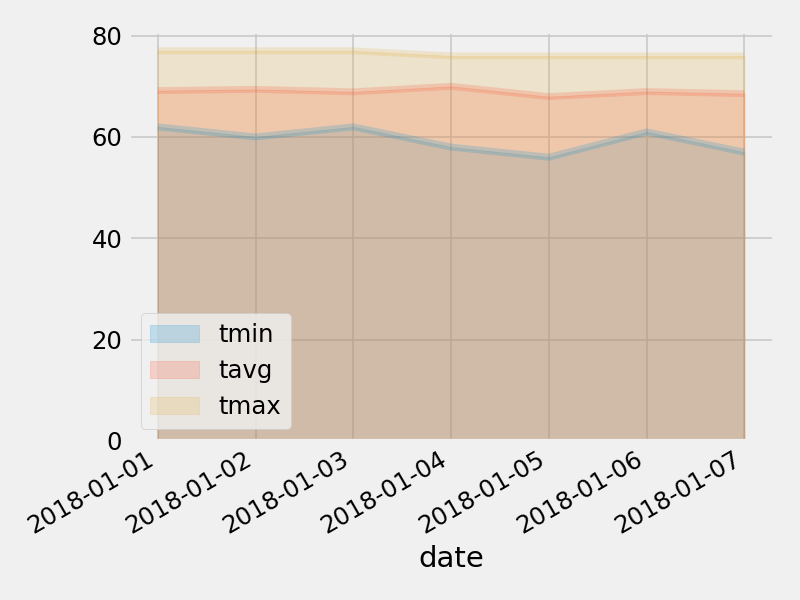

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
